In [29]:
# Dependencies
import pandas as pd
from pathlib import Path

# File to Load 
customer_data_to_load = Path("Resources/customer_churn.csv")

# Read Data File and store into Pandas DataFrames
churn_df = pd.read_csv(customer_data_to_load)

# View the dataset
churn_df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [30]:
# Changing column names to make data cleaner
churn_df = churn_df.rename(columns = {'Total_Purchase': 'Total Purchase', 'Account_Manager' : 'Account Manager', 'Num_Sites': 'Number of Websites Used', 'Onboard_date' : 'Onboard Date'})

# View updated column names
churn_df.head()

,Names,Age,Total Purchase,Account Manager,Years,Number of Websites Used,Onboard Date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [32]:
churn_df.to_csv('churn.csv', index=False)

In [13]:
# Summarize the data
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Names                    900 non-null    object 
 1   Age                      900 non-null    float64
 2   Total Purchase           900 non-null    float64
 3   Account Manager          900 non-null    int64  
 4   Years                    900 non-null    float64
 5   Number of Websites Used  900 non-null    float64
 6   Onboard Date             900 non-null    object 
 7   Location                 900 non-null    object 
 8   Company                  900 non-null    object 
 9   Churn                    900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [14]:
# Import matplotlib
import matplotlib.pyplot as plt

In [16]:
# Graphing ages of clients

# Create bins
bins = [0, 29.9, 39.9, 49.9, 59.9, 69.9]
# Create group names for bins
group_names = ["20s", "30s", "40s", "50s", "60s"]

# Slice the age data and place in bins
churn_df["Age Group"] = pd.cut(churn_df["Age"], 
                                              bins, labels=group_names, 
                                              include_lowest=True)
churn_df.head()

,Names,Age,Total Purchase,Account Manager,Years,Number of Websites Used,Onboard Date,Location,Company,Churn,Age Group
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1,40s
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1,40s
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1,30s
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1,40s
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1,30s


In [20]:
# Exploring age group data

churn_df["Age Group"].value_counts()

40s    487
30s    299
50s     93
20s     19
60s      2
Name: Age Group, dtype: int64

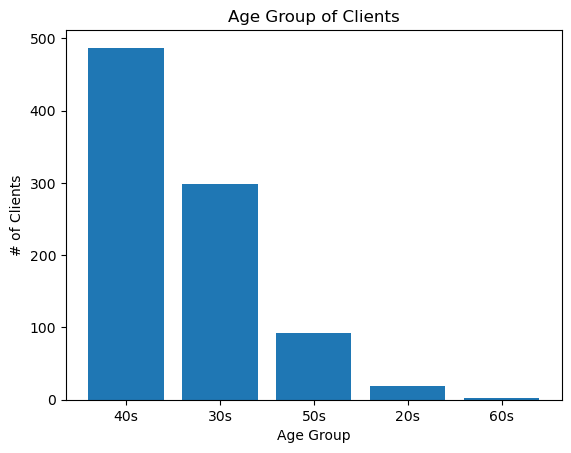

In [25]:
# Graph the data
x_axis = churn_df["Age Group"].value_counts().index
y_axis = churn_df["Age Group"].value_counts()
plt.bar(x_axis, y_axis)
plt.xlabel("Age Group")
plt.ylabel("# of Clients")
plt.xticks(x_axis)
plt.title("Age Group of Clients")
plt.show()

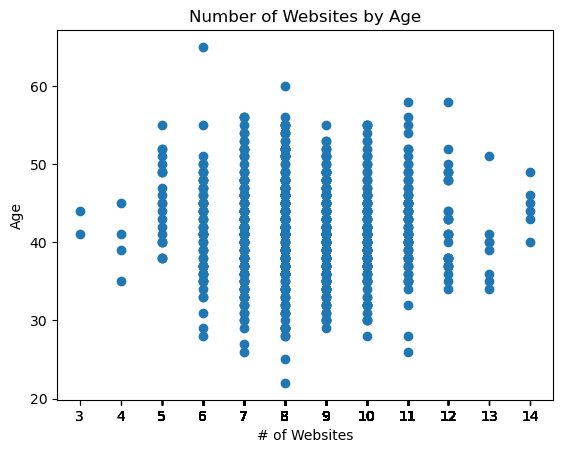

In [28]:
# Looking at age groups by number of sites

y_axis = churn_df["Age"]
x_axis = churn_df["Number of Websites Used"]
plt.scatter(x_axis, y_axis)
plt.ylabel("Age")
plt.xlabel("# of Websites")
plt.xticks(x_axis)
plt.title("Number of Websites by Age")
plt.show()